In [7]:
import time
start_time = time.time()
import os
import numpy as np
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras import backend as K
from keras.optimizers import adam
from keras import models
import cv2
#import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time 
#import progressbar
#from tqdm.notebook import tqdm_notebook
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, AveragePooling2D, Conv2D, Flatten

In [8]:
# extracting dataframe of cartoon dataset
face_shape = pd.read_csv('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21/cartoon_set/labels.csv', sep = '\t')
face_shape = face_shape.drop(columns = [face_shape.columns[0]]).drop(columns = [face_shape.columns[1]])
face_shape['face_shape'] = face_shape['face_shape'].apply(str)
face_shape

,face_shape,file_name
0,4,0.png
1,4,1.png
2,3,2.png
3,0,3.png
4,2,4.png
...,...,...
9995,2,9995.png
9996,3,9996.png
9997,2,9997.png
9998,2,9998.png


In [9]:
img = ('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21/cartoon_set/img')
# splitting training and testing dataset
training, testing = np.split(face_shape.sample(frac=1), [int(0.9*len(face_shape)),]) #splitting at n-array
print(training, testing)
#print_summary(training, testing)


     face_shape file_name
6083          3  6083.png
2771          0  2771.png
5507          2  5507.png
7866          3  7866.png
6593          2  6593.png
...         ...       ...
1600          0  1600.png
3682          3  3682.png
4194          1  4194.png
411           3   411.png
6396          3  6396.png

[9000 rows x 2 columns]      face_shape file_name
6813          3  6813.png
3489          2  3489.png
8480          3  8480.png
6951          1  6951.png
6476          1  6476.png
...         ...       ...
7726          1  7726.png
9624          1  9624.png
4397          3  4397.png
5966          1  5966.png
9320          1  9320.png

[1000 rows x 2 columns]


In [10]:
# set up data generator and further split training dataset for validation set
data_generator = ImageDataGenerator(
    rescale = 1./255.,
    validation_split = 0.2,
    horizontal_flip=True,
    vertical_flip=True   
)

# Get batches of training dataset from the dataframe
print("Training Dataset Preparation: ")
train_generator = data_generator.flow_from_dataframe(
        dataframe = training, directory = img ,
        x_col = "file_name", y_col = "face_shape",
        class_mode = 'categorical', target_size = (32,32),
        batch_size = 128, subset = 'training') 
   
# Get batches of validation dataset from the dataframe
print("\nValidation Dataset Preparation: ")
validation_generator = data_generator.flow_from_dataframe(
        dataframe = training, directory = img ,
        x_col = "file_name", y_col = "face_shape",
        class_mode = 'categorical', target_size = (32,32),
        batch_size = 128, subset = 'validation')

Training Dataset Preparation: 
Found 7200 validated image filenames belonging to 5 classes.

Validation Dataset Preparation: 
Found 1800 validated image filenames belonging to 5 classes.


In [24]:
model = Sequential(name = 'Lenet5')

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())


model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=5, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = 'Adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "Lenet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
average_pooling2d_9 (Average (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
average_pooling2d_10 (Averag (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 120)               553080    
_________________________________________________________________
dense_14 (Dense)             (None, 84)                10164

In [26]:
# batch_size = 32
history = model.fit_generator(
                                train_generator,
                                epochs=13,
                                steps_per_epoch=train_generator.samples // train_generator.batch_size, 
                                validation_data=validation_generator,
                                validation_steps=validation_generator.samples // validation_generator.batch_size
                                )

Epoch 1/13
56/56 [==============================] - 66s 1s/step - loss: 1.6105 - accuracy: 0.2042 - val_loss: 1.6101 - val_accuracy: 0.1992
Epoch 2/13
56/56 [==============================] - 75s 1s/step - loss: 1.6097 - accuracy: 0.2022 - val_loss: 1.6090 - val_accuracy: 0.2159
Epoch 3/13
56/56 [==============================] - 51s 908ms/step - loss: 1.5891 - accuracy: 0.2551 - val_loss: 1.5176 - val_accuracy: 0.3666
Epoch 4/13
56/56 [==============================] - 42s 753ms/step - loss: 1.2782 - accuracy: 0.4143 - val_loss: 1.0980 - val_accuracy: 0.4976
Epoch 5/13
56/56 [==============================] - 51s 907ms/step - loss: 1.0634 - accuracy: 0.5208 - val_loss: 1.0952 - val_accuracy: 0.5203
Epoch 6/13
56/56 [==============================] - 39s 690ms/step - loss: 0.9099 - accuracy: 0.6201 - val_loss: 0.9403 - val_accuracy: 0.5927
Epoch 7/13
56/56 [==============================] - 38s 671ms/step - loss: 0.7873 - accuracy: 0.6838 - val_loss: 0.8071 - val_accuracy: 0.7273
Epoch

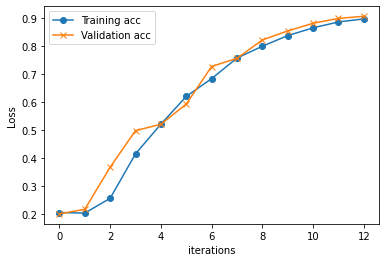

In [28]:
plt.plot(history.history['accuracy'], 'o-', label='Training acc')
plt.plot(history.history['val_accuracy'], 'x-', label='Validation acc')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()

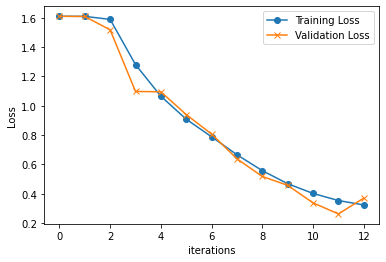

In [29]:
plt.plot(history.history['loss'], 'o-', label='Training Loss')
plt.plot(history.history['val_loss'], 'x-', label='Validation Loss')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()

In [30]:
model.layers

filter sizes :  (3, 3, 3, 64)


D:\Anaconda\envs\lab1\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


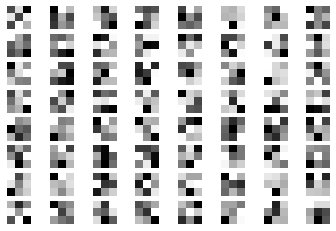

In [33]:
# retrieve weights from the first convolutional layer
filters, biases = model.layers[0].get_weights()
print('filter sizes : ', filters.shape)

# normalize filter values
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = filters.shape[3]
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(f.shape[2]):
        plt.subplot(8, 8, i+1)
        plt.imshow(f[:, :, j], cmap='gray')
        plt.axis('off')

In [28]:
# saving model
from keras.models import load_model

modelFile = 'face_shape.h5'

my_model.save(modelFile)

In [29]:
os.getcwd()

'C:\\Users\\82419\\Machine Learning\\assignment\\task B'